In [3]:
# include matplotlib pandas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

### Loading the clients data

In [32]:
# read the data
clients_data = pd.read_csv('clients_data_competition.csv')
orders_data = pd.read_csv('orders_data_competition.csv')

### Fix client's data

In [33]:
clients_data = clients_data[clients_data['Company Name'] == 'HSB']
clients_data['OpenDate'] = pd.to_datetime(clients_data['OpenDate'])
clients_data['BirthDate'] = pd.to_datetime(clients_data['BirthDate'])

orders_data = orders_data[orders_data['Order Via'] == 'Online']
#convert the date to datetime
orders_data['Order Time'] = pd.to_datetime(orders_data['Order Time'])
orders_data['Expire Date'] = pd.to_datetime(orders_data['Expire Date'])

# change Client Type Name to 0 (Individual) and 1 (Companies)
clients_data['Client Type Name'] = clients_data['Client Type Name'].map({'Individuals': 0, 'Companies': 1})

In [34]:
clients_data['Is Dormant'] = clients_data['Is Dormant'].replace(-1.0, 1)
clients_data['Is Dormant'] = clients_data['Is Dormant'].astype(int)

In [45]:
merged_data = clients_data.merge(orders_data, on='Account ID')
merged_data

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity
0,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,61011,Egypt,19,Buy,2024-02-28 11:06:33,Online,1,0,2024-02-28,Executed,720,68.550,Real Estate,720,720
1,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,225079,Egypt,152,Sell,2022-01-04 12:06:31,Online,1,0,2022-01-04,Executed,1175,7.700,INDUSTRIAL,1175,1175
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227773,Egypt,66,Buy,2022-01-05 11:32:35,Online,1,0,2022-01-05,Executed,1000,9.900,Industries,1000,1000
3,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227827,Egypt,66,Sell,2022-01-05 11:37:21,Online,1,0,2022-01-05,Executed,1000,9.850,Industries,1000,1000
4,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,227850,Egypt,66,Sell,2022-01-05 11:40:13,Online,1,0,2022-01-05,Executed,1000,9.950,Industries,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838586,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811540,Egypt,30,Buy,2024-03-06 13:04:18,Online,1,0,2024-03-06,Executed,74,67.500,Industries,74,74
1838587,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1811797,Egypt,6,Buy,2024-03-06 13:23:30,Online,1,0,2024-03-06,Executed,1250,3.530,Industries,1250,1250
1838588,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1977414,Egypt,9,Sell,2024-03-07 09:51:43,Online,0,1,2024-03-07,Not Executed,65,5.240,Financials,0,65
1838589,9121,13520,Male,Not Assigned,HSB,0,0,0,0,0,2024-03-04,1953-09-11,1987832,Egypt,248,Buy,2024-03-10 14:22:37,Online,0,1,2024-03-10,Not Executed,40,1.249,INVESTMENT,0,40


### Exploration

In [46]:
data = clients_data['Is Profile Suspended'].sum()
print(data)

2260


In [47]:
merged_data.shape

(1838591, 27)

In [48]:
canceled_data = merged_data[merged_data["Is Canceled"] == 1]
canceled_data.shape

(380468, 27)

In [49]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] == 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()

/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_8361/848986123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    4.379100e+04
mean     1.972624e+04
std      4.233853e+05
min     -5.829700e+06
25%     -8.325000e+03
50%      1.289200e+03
75%      1.498750e+04
max      4.359570e+07
Name: Transaction Amount, dtype: float64

In [50]:
merged_data = merged_data[merged_data["Is Canceled"] == 1]
merged_data.shape

(380468, 27)

In [51]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] != 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()


/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_8361/3085000630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    3.700810e+05
mean     1.255355e+04
std      1.483401e+06
min     -3.055000e+07
25%     -1.299000e+04
50%      7.200000e+01
75%      1.560900e+04
max      8.851400e+08
Name: Transaction Amount, dtype: float64

In [52]:
#check the transactions of the suspended profiles
suspended_data = merged_data[merged_data['Is Profile Suspended'] == 1]
suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
                                  -suspended_data['quantity'] * suspended_data['Price'])
# #plot the transactions of the suspended profiles
# suspended_transactions = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'], 
#                                   -suspended_data['quantity'] * suspended_data['Price'])
#make the suspended_transacitons a dataframe
# suspended_transactions = pd.DataFrame(sus, columns=['Transactions'])

suspended_data['Transaction Amount'].describe()


/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_8361/2910621161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspended_data['Transaction Amount'] = np.where(suspended_data['Order Type'] == 'Sell', suspended_data['quantity'] * suspended_data['Price'],


count    1.038700e+04
mean     3.546185e+04
std      8.113182e+05
min     -3.075000e+06
25%     -9.485500e+03
50%      5.988000e+02
75%      1.628800e+04
max      4.359570e+07
Name: Transaction Amount, dtype: float64

In [53]:
#plot the orders of the suspended profiles
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [58]:

# Define 'Churned' column based on 'Is Closed' or 'Is Dormant'
clients_data['Churned'] = np.where((clients_data['Is Closed'] == 1) | (clients_data['Is Dormant'] == 1), 1, 0)


In [59]:
# get todays date in dt
today = pd.to_datetime('today').normalize()
today

Timestamp('2024-04-20 00:00:00')

In [60]:
# get dormant customers from merged df
dormant_customers = merged_data[merged_data['Is Dormant'] == 1]
# group customers using client id and get the last order time
dormant_customers = dormant_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
dormant_customers['Years Since Last Order'] = (pd.to_datetime('today') - dormant_customers['Order Time']).dt.days

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9975e3b280>]],
      dtype=object)

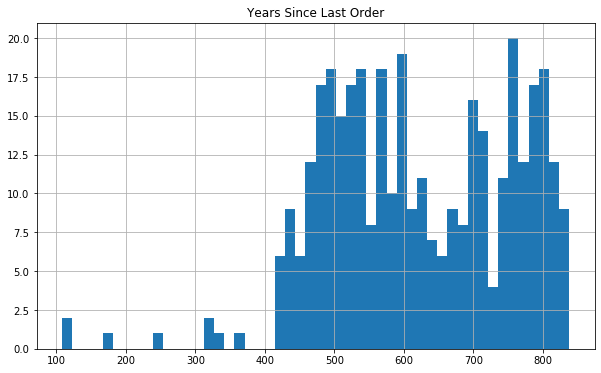

In [61]:
dormant_customers.hist('Years Since Last Order', bins=50, figsize=(10, 6))

In [74]:
# get dormant customers from merged df
dormant_customers = merged_data[merged_data['Is Dormant'] == 1]
# group customers using client id and get the last order time
dormant_customers = dormant_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
dormant_customers['Years Since Last Order'] = (pd.to_datetime('today') - dormant_customers['Order Time']).dt.days

In [63]:
# sort the data primarly by customer id and secondly by the order time in ascending order
sorted_customers = merged_data.sort_values(['Client ID', 'Order Time'])
sorted_customers.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Order ID,Market Key,Security ID,Order Type,Order Time,Order Via,Is Completed,Is Canceled,Expire Date,Execution Status,quantity,Price,Sector Name,Executed Quantity,Quantity
9,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,414606,Egypt,42,Buy,2022-05-25 12:12:24,Online,0,1,2022-05-27,Not Executed,4000,3.81,Information Technology,0,4000
18,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,464553,Egypt,42,Buy,2022-07-07 14:28:48,Online,0,1,2022-07-07,Not Executed,3000,2.90,Information Technology,0,3000
46,3,3,Male,Low,HSB,0,0,0,0,0,2014-02-17,1953-01-14,879866,Egypt,12,Sell,2023-01-17 12:02:35,Online,0,1,2023-01-17,Not Executed,21045,11.30,Financials,0,21045
47,3,3,Male,Low,HSB,0,0,0,0,0,2014-02-17,1953-01-14,879882,Egypt,12,Sell,2023-01-17 12:03:44,Online,0,1,2023-01-17,Not Executed,21045,11.30,Financials,0,21045
75,3,3,Male,Low,HSB,0,0,0,0,0,2014-02-17,1953-01-14,1221986,Egypt,54,Sell,2023-06-13 12:50:17,Online,0,1,2023-06-13,Not Executed,23000,12.90,Information Technology,0,23000


In [64]:
# create a new dataframe per customer that has its transactions sorted by order time
customer_transactions = sorted_customers.reset_index(drop=True).groupby('Client ID').apply(lambda x: x.sort_values('Order Time'))
customer_transactions

Client ID  Account ID Gender     Risk Rate Company Name  \
Client ID                                                                   
2         0               2           2   Male           Low          HSB   
          1               2           2   Male           Low          HSB   
3         2               3           3   Male           Low          HSB   
          3               3           3   Male           Low          HSB   
          4               3           3   Male           Low          HSB   
...                     ...         ...    ...           ...          ...   
9121      380463       9121       13520   Male  Not Assigned          HSB   
          380464       9121       13520   Male  Not Assigned          HSB   
          380465       9121       13520   Male  Not Assigned          HSB   
          380466       9121       13520   Male  Not Assigned          HSB   
          380467       9121       13520   Male  Not Assigned          HSB   

                  Is Closed  Is Dormant  Is Profile Suspended  \
Client ID                                                       
2         0               0           0                     0   
          1               0           0                     0   
3         2               0           0                     0   
          3               0           0                     0   
          4               0           0                     0   
...                     ...         ...                   ...   
9121      380463          0           0                     0   
          380464          0           0                     0   
          380465          0           0                     0   
          380466          0           0                     0   
          380467          0           0                     0   

                  Is Client Suspended  Client Type Name   OpenDate  BirthDate  \
Client ID                                                                       
2         0                         0                 0 2014-02-17 1971-05-14   
          1                         0                 0 2014-02-17 1971-05-14   
3         2                         0                 0 2014-02-17 1953-01-14   
          3                         0                 0 2014-02-17 1953-01-14   
          4                         0                 0 2014-02-17 1953-01-14   
...                               ...               ...        ...        ...   
9121      380463                    0                 0 2024-03-04 1953-09-11   
          380464                    0                 0 2024-03-04 1953-09-11   
          380465                    0                 0 2024-03-04 1953-09-11   
          380466                    0                 0 2024-03-04 1953-09-11   
          380467                    0                 0 2024-03-04 1953-09-11   

                  Order ID Market Key  Security ID Order Type  \
Client ID                                                       
2         0         414606      Egypt           42        Buy   
          1         464553      Egypt           42        Buy   
3         2         879866      Egypt           12       Sell   
          3         879882      Egypt           12       Sell   
          4        1221986      Egypt           54       Sell   
...                    ...        ...          ...        ...   
9121      380463     88667      Egypt            9       Sell   
          380464     44393      Egypt            9       Sell   
          380465   1977414      Egypt            9       Sell   
          380466     89272      Egypt            9       Sell   
          380467   1987832      Egypt          248        Buy   

                          Order Time Order Via  Is Completed  Is Canceled  \
Client ID                                                                   
2         0      2022-05-25 12:12:24    Online             0            1   
          1      2022-07-07 14:28:48   

In [78]:
# Sort data by Account ID and OrderDate to ensure the order dates are in chronological order
sorted_customers.sort_values(by=['Account ID', 'Order Time'], inplace=True)

# Calculate the difference in hrs between each order for each account
sorted_customers['OrderDiff'] = sorted_customers.groupby('Account ID')['Order Time'].diff().dt.days

# Calculate the average difference in time between orders for each account
average_order_diff = sorted_customers.groupby('Account ID')['OrderDiff'].mean().reset_index(name='Average Order Difference')

# Display the first few rows of the average order difference data
average_order_diff

,Account ID,Average Order Difference
0,2,43.000000
1,3,41.300000
2,4,1.333333
3,7,6.200000
4,12,1.600000
...,...,...
5573,13509,NaN
5574,13510,0.000000
5575,13512,0.000000
5576,13519,NaN


In [72]:
# group by Account ID and get the count of the rows
orders_count = sorted_customers.groupby('Account ID').size().reset_index(name='Orders Count')



In [73]:
(orders_count == 1).sum()

Account ID        0
Orders Count    559
dtype: int64

In [83]:
last_day = orders_data['Order Time'].max()

In [84]:
# group customers using client id and get the last order time
a_customers = sorted_customers.groupby('Account ID')['Order Time'].max().reset_index()
# define a new column that shows the number of years since the last orders
a_customers['Days Since Last Order'] = (last_day - a_customers['Order Time']).dt.days
(a_customers).head()


,Account ID,Order Time,Days Since Last Order
0,2,2022-07-07 14:28:48,612
1,3,2024-03-07 14:15:09,3
2,4,2023-11-07 14:13:11,124
3,7,2024-03-10 09:55:06,0
4,12,2024-02-28 10:44:54,11


In [99]:
#merge the dataframes
churn_data = pd.merge(average_order_diff, a_customers, on='Account ID')
churn_data.drop('Order Time', axis=1, inplace=True)

churn_data['churn'] = churn_data['Days Since Last Order'] > 2*churn_data['Average Order Difference']
churn_data['churn'].sum() / len(churn_data)
churn_data.describe()


,Account ID,Average Order Difference,Days Since Last Order
count,5578.000000,5019.000000,5578.000000
mean,6940.752062,26.173192,159.274830
std,3963.944944,52.208257,215.272839
min,2.000000,0.000000,0.000000
25%,3404.250000,2.703814,7.000000
50%,7167.000000,8.905882,40.000000
75%,10402.500000,27.000000,263.000000
max,13520.000000,651.000000,798.000000


/var/folders/xt/jp3v18wd171bjzynfh02f21h0000gq/T/ipykernel_8361/3790331801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonan_churn['cluster'] = kmeans.fit_predict(nonan_churn[['Average Order Difference']])


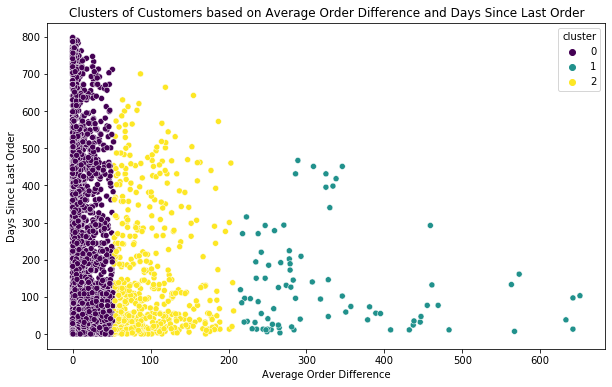

In [118]:
#cluster the average order difference using k-means with k = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
nonan_churn = churn_data.dropna()
nonan_churn['cluster'] = kmeans.fit_predict(nonan_churn[['Average Order Difference']])
nonan_churn['cluster'].value_counts()
#plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=nonan_churn, x='Average Order Difference', y='Days Since Last Order', hue='cluster', palette='viridis')
plt.title('Clusters of Customers based on Average Order Difference and Days Since Last Order')
plt.show()

## Total orders distribution graph

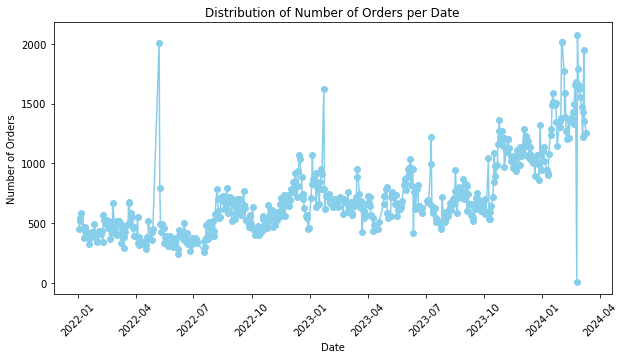

In [86]:
Date = pd.to_datetime(merged_data['Order Time'])

# remove the time part
Date = Date.dt.date

# Count the number of orders for each date
order_count_per_date = Date.value_counts()

# Plot the distribution of the number of orders per date
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_count_per_date.plot(kind='line', marker='o', color='skyblue')

plt.title('Distribution of Number of Orders per Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()